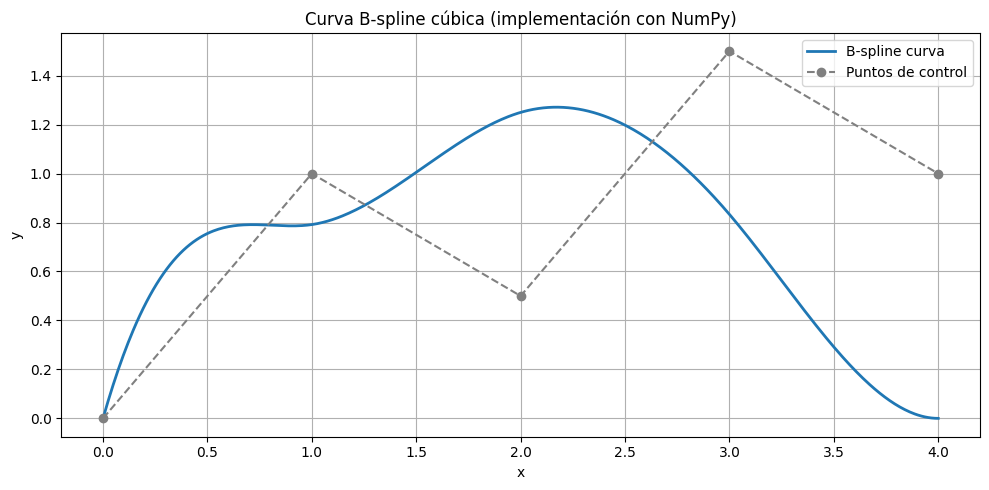

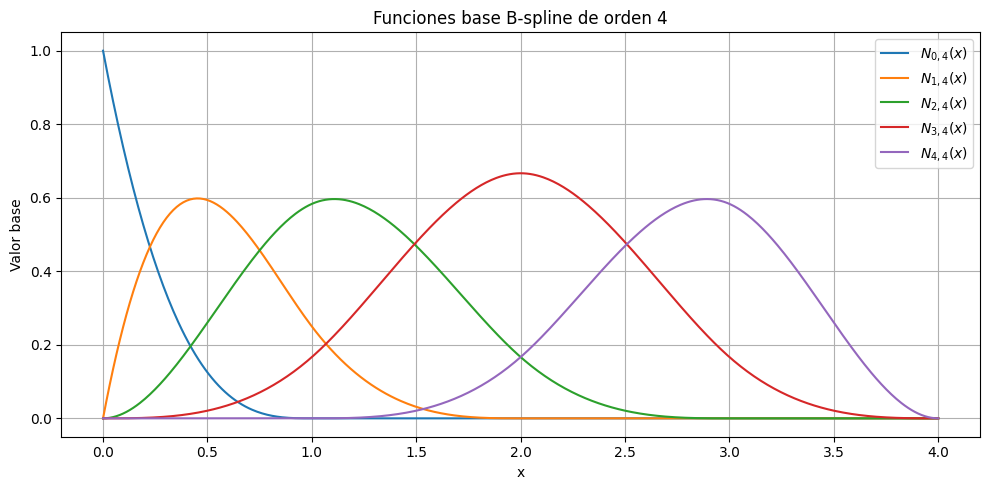

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bspline_basis(i, k, t, x):
    """Base B-spline recursiva: N_{i,k}(x)"""
    if k == 1:
        return np.where((x >= t[i]) & (x < t[i+1]), 1.0, 0.0)
    else:
        denom1 = t[i+k-1] - t[i]
        denom2 = t[i+k] - t[i+1]

        term1 = 0.0
        term2 = 0.0

        if denom1 > 0:
            term1 = ((x - t[i]) / denom1) * bspline_basis(i, k-1, t, x)
        if denom2 > 0:
            term2 = ((t[i+k] - x) / denom2) * bspline_basis(i+1, k-1, t, x)

        return term1 + term2

def bspline_curve(x_eval, c, k, t):
    """Evalúa la curva B-spline en puntos x_eval usando coeficientes c"""
    curve = np.zeros_like(x_eval)
    for i in range(len(c)):
        curve += c[i] * bspline_basis(i, k, t, x_eval)
    return curve

def plot_bspline_and_bases():
    # Puntos de control
    x_pts = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
    y_pts = np.array([0.0, 1.0, 0.5, 1.5, 1.0])

    k = 4  # orden = grado + 1 → cúbico
    n = len(x_pts)
    
    # Nodos (knots): extremos repetidos
    t = np.concatenate((
        np.full(k-1, x_pts[0]),
        x_pts,
        np.full(k-1, x_pts[-1])
    ))

    # Puntos para evaluar
    x_eval = np.linspace(x_pts[0], x_pts[-1], 500)
    y_eval = bspline_curve(x_eval, y_pts, k, t)

    # --- Graficar curva ---
    plt.figure(figsize=(10, 5))
    plt.plot(x_eval, y_eval, label="B-spline curva", lw=2)
    plt.plot(x_pts, y_pts, 'o--', label="Puntos de control", color="gray")
    plt.title("Curva B-spline cúbica (implementación con NumPy)")
    plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Graficar funciones base ---
    plt.figure(figsize=(10, 5))
    for i in range(n):
        y_base = bspline_basis(i, k, t, x_eval)
        plt.plot(x_eval, y_base, label=f"$N_{{{i},{k}}}(x)$")
    plt.title(f"Funciones base B-spline de orden {k}")
    plt.xlabel("x"); plt.ylabel("Valor base")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_bspline_and_bases()


In [4]:
import sympy as sp
import numpy as np

def bspline_basis_sym(i, k, t, x):
    """Devuelve la función simbólica N_{i,k}(x) usando recursión de Cox–de Boor"""
    if k == 1:
        return sp.Piecewise((1, (x >= t[i]) & (x < t[i+1])), (0, True))
    else:
        denom1 = t[i+k-1] - t[i]
        denom2 = t[i+k] - t[i+1]

        term1 = 0
        term2 = 0

        if denom1 != 0:
            term1 = ((x - t[i]) / denom1) * bspline_basis_sym(i, k-1, t, x)
        if denom2 != 0:
            term2 = ((t[i+k] - x) / denom2) * bspline_basis_sym(i+1, k-1, t, x)

        return term1 + term2

def obtener_ecuacion_bsplines_sym(x_pts, y_pts, k):
    n = len(x_pts)
    t = np.concatenate((
        np.full(k-1, x_pts[0]),
        x_pts,
        np.full(k-1, x_pts[-1])
    ))

    t = list(t)
    x = sp.Symbol('x')
    S = 0

    print(f"📘 Curva B-spline de grado {k-1} (orden {k}):")
    for i in range(n):
        N_ik = bspline_basis_sym(i, k, t, x)
        S += y_pts[i] * N_ik
        print(f"N_{{{i},{k}}}(x):")
        sp.pprint(sp.simplify(N_ik), use_unicode=True)
        print()

    print("🎯 Curva completa:")
    sp.pprint(sp.simplify(S), use_unicode=True)
    return sp.simplify(S)

# Ejemplo:
x_pts = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_pts = np.array([0.0, 1.0, 0.5, 1.5, 1.0])
k = 4  # cúbico

ecuacion = obtener_ecuacion_bsplines_sym(x_pts, y_pts, k)


📘 Curva B-spline de grado 3 (orden 4):
N_{0,4}(x):
⎧            3                     
⎪-1.0⋅(x - 1)   for x ≥ 0 ∧ x < 1.0
⎨                                  
⎪      0             otherwise     
⎩                                  

N_{1,4}(x):
⎧                           2                       
⎪(2.0 - 1.0⋅x)⋅(0.5⋅x - 1.0)   for x ≥ 1.0 ∧ x < 2.0
⎪                                                   
⎨   ⎛      2              ⎞                         
⎪ x⋅⎝1.75⋅x  - 4.5⋅x + 3.0⎠     for x ≥ 0 ∧ x < 1.0 
⎪                                                   
⎩             0                      otherwise      

N_{2,4}(x):
⎧                     3        2                                     
⎪- 0.166666666666667⋅x  + 1.5⋅x  - 4.5⋅x + 4.5  for x ≥ 2.0 ∧ x < 3.0
⎪                                                                    
⎪                    3        2                                      
⎪ 0.583333333333333⋅x  - 3.0⋅x  + 4.5⋅x - 1.5   for x ≥ 1.0 ∧ x < 2.0
⎨                     

KeyboardInterrupt: 